In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import the 'Breast Cancer' dataset
cancer = pd.read_csv(r'C:\Users\Prasad\Downloads\data.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
target = cancer['diagnosis']
cancer.drop(['id','Unnamed: 32', 'diagnosis'], axis = 1, inplace = True)

In [4]:
target = target.map({'M': 1, 'B': 0})

In [5]:
# Create 2 clusters for the dataset using KMeans clustering
from sklearn.cluster import KMeans
clusters = 2
kmeans = KMeans(n_clusters = clusters)
cancer_ = kmeans.fit(cancer)

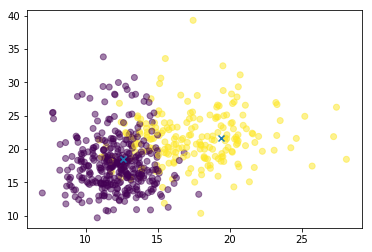

In [6]:
# visualise the KMeans clusters
centers = kmeans.cluster_centers_
labels = kmeans.labels_
plt.scatter(x = cancer.iloc[:,0], y = cancer.iloc[:,1], c = target, alpha = 0.5, )
plt.scatter(x = centers[:,0], y = centers[:,1], marker = 'x')

In [7]:
# Create Hierarchicial clustering model using linkages : {“ward”, “complete”, “average”}
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
linkages = ['ward', 'complete', 'average']
clustering = AgglomerativeClustering(linkage = 'ward', n_clusters = 2)
clustering.fit(cancer)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x000001986437F048>)

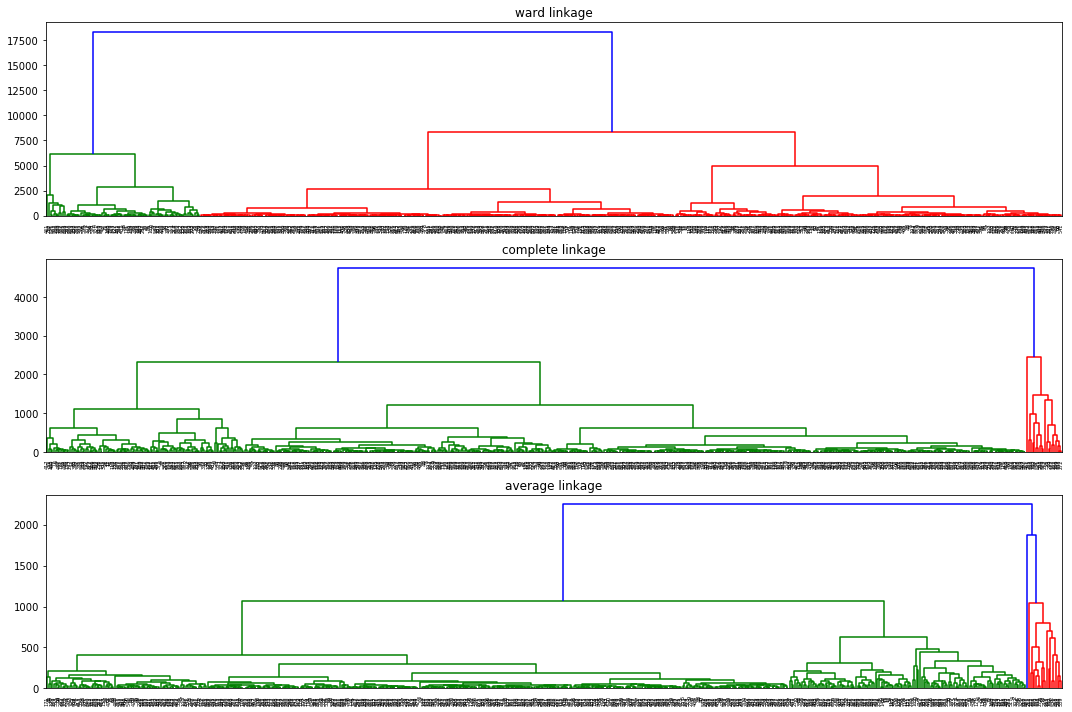

In [8]:
#visualize the clusters
f, ax = plt.subplots(3,1, figsize = [15,10])
i = 0
for link in linkages:
    Z = linkage(cancer, method = link)
    dendrogram(Z, ax = ax[i])
    ax[i].set_title(link + ' linkage')
    i += 1
    plt.tight_layout()

### Compare the results
After reading a few responses Stack Exchange [Comparing hierarchical clusters][1]. As stated on the first point, clusters should never be compared. Each dendrogram is unique and no metric is available.


[1]:[https://stats.stackexchange.com/questions/63546/comparing-hierarchical-clustering-dendrograms-obtained-by-different-distances?noredirect=1&lq=1]